(83706,)


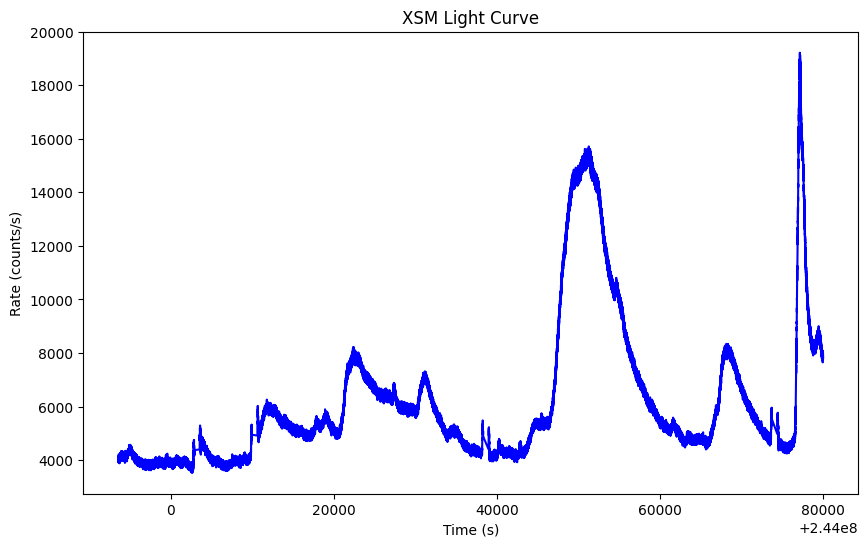

In [10]:
import matplotlib.pyplot as plt
from astropy.io import fits

# Load the light curve FITS file
with fits.open('../uploads/') as hdul:
    data = hdul[1].data  # Light curve data is usually in the second extension
    time = data['TIME']
    rate = data['RATE']

# Plot the light curve
print(data.shape)

plt.figure(figsize=(10, 6))
plt.plot(time, rate, color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Rate (counts/s)')
plt.title('XSM Light Curve')
plt.show()



(8380,)


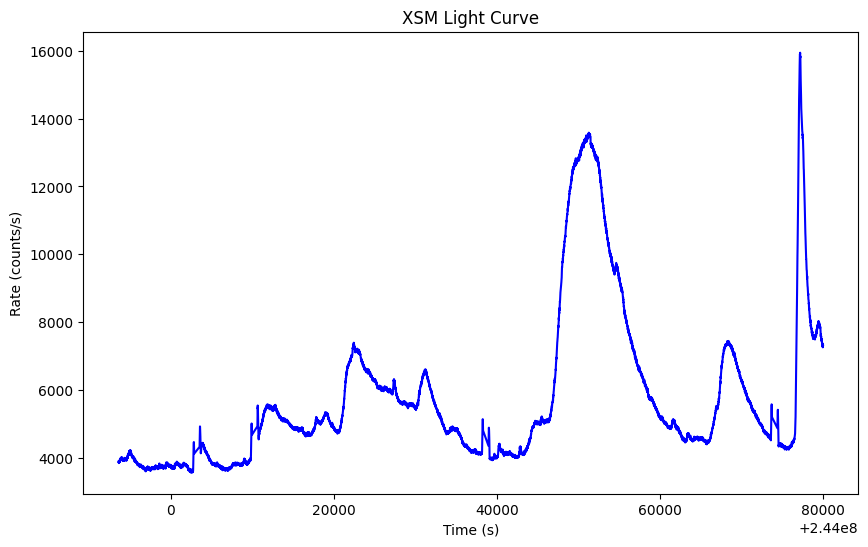

In [20]:
import matplotlib.pyplot as plt
from astropy.io import fits

# Load the light curve FITS file
with fits.open('/home/nikhatsingla/Output.lc') as hdul:
    data = hdul[1].data  # Light curve data is usually in the second extension
    time = data['TIME']
    rate = data['RATE']

# Plot the light curve
print(data.shape)

plt.figure(figsize=(10, 6))
plt.plot(time, rate, color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Rate (counts/s)')
plt.title('XSM Light Curve')
plt.show()



(83207,)


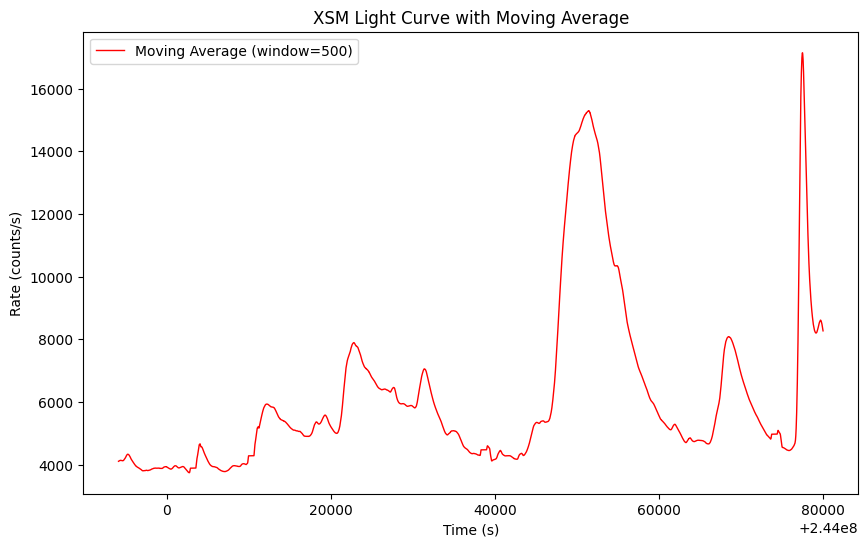

In [12]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

# Function to calculate moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

# Load the light curve FITS file
with fits.open('/home/nikhatsingla/Documents/xsm/data/2024/09/25/calibrated/ch2_xsm_20240925_v1_level2.lc') as hdul:
    data = hdul[1].data  # Light curve data is usually in the second extension
    time = data['TIME']
    rate = data['RATE']

# Plot the original light curve
plt.figure(figsize=(10, 6))
# plt.plot(time, rate, label='Original Rate', color='blue', alpha=0.6)

# Compute and plot the moving average
window_size = 500  # Define the window size for the moving average
rate_smooth = moving_average(rate, window_size)

print(rate_smooth.shape)

# Adjust time array to match the size of the moving average result
time_smooth = time[window_size - 1:]  # Adjust time array to fit the shorter smoothed data

plt.plot(time_smooth, rate_smooth, label=f'Moving Average (window={window_size})', color='red', linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Rate (counts/s)')
plt.title('XSM Light Curve with Moving Average')
plt.legend()
plt.show()


[    1     5     8 ... 82912 82914 82934]
(7175,)


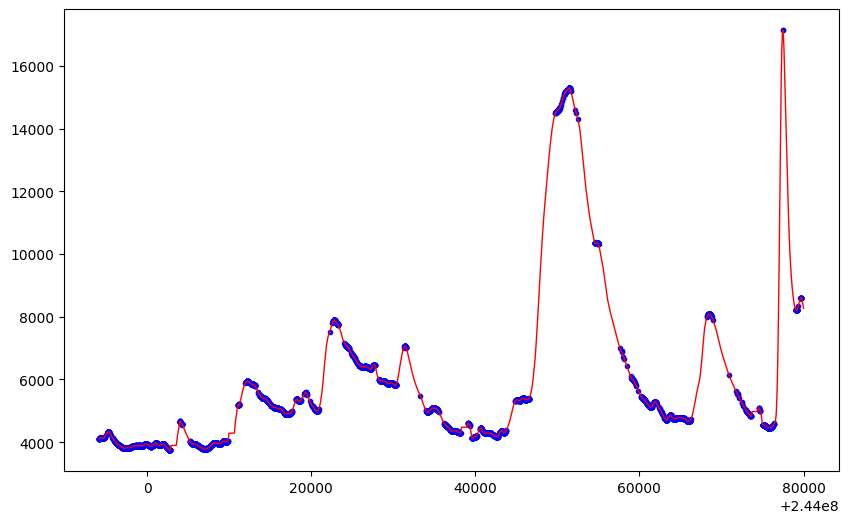

In [19]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(rate_smooth)

print(peaks)

print(peaks.shape)

plt.figure(figsize=(10, 6))

plt.plot(time_smooth[peaks], rate_smooth[peaks], ".", label='Peaks', color='blue')
plt.plot(time_smooth, rate_smooth, label=f'Moving Average (window={window_size})', color='red', linewidth=1)

In [9]:
from astropy.io import fits

# Open the .pha file
hdul = fits.open('/home/nikhatsingla/Documents/xsm/data/2024/09/25/calibrated/ch2_xsm_20240925_v1_level2.pha')

# Access the primary header data
hdul.info()

# Access the data in the .pha file
data = hdul[1].data
print(data, '\n', data.shape)

Filename: /home/nikhatsingla/Documents/xsm/data/2024/09/25/calibrated/ch2_xsm_20240925_v1_level2.pha
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1  SPECTRUM      1 BinTableHDU     89   1400R x 9C   [1J, 512J, 512E, 512E, 512E, 1D, 1D, 1D, 1B]   
[(   0, [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,

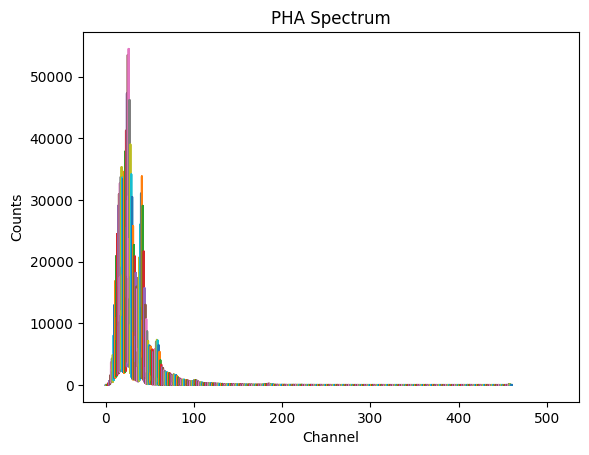

In [8]:
import matplotlib.pyplot as plt

# Assuming 'CHANNEL' and 'COUNTS' are in the data
channel = data['CHANNEL']
counts = data['COUNTS']

plt.plot(channel, counts)
plt.xlabel('Channel')
plt.ylabel('Counts')
plt.title('PHA Spectrum')
plt.show()